We will begin by examining some numerical and graphical summaries of the `Smarket` data, which is part of the `ISLR` library. This data set consists of percentage returns for the S&P 500 stock index over 1, 250 days, from the beginning of 2001 until the end of 2005. For each date, we have recorded the percentage returns for each of the five previous trading days, Lag1 through Lag5. We have also recorded Volume (the number of shares traded on the previous day, in billions), Today (the percentage return on the date in question) and Direction (whether the market was Up or Down on this date).

In [14]:
library(ISLR)

In [2]:
names(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [3]:
head(Smarket)

Year Lag1   Lag2   Lag3   Lag4   Lag5   Volume Today  Direction
1 2001  0.381 -0.192 -2.624 -1.055  5.010 1.1913  0.959 Up       
2 2001  0.959  0.381 -0.192 -2.624 -1.055 1.2965  1.032 Up       
3 2001  1.032  0.959  0.381 -0.192 -2.624 1.4112 -0.623 Down     
4 2001 -0.623  1.032  0.959  0.381 -0.192 1.2760  0.614 Up       
5 2001  0.614 -0.623  1.032  0.959  0.381 1.2057  0.213 Up       
6 2001  0.213  0.614 -0.623  1.032  0.959 1.3491  1.392 Up

In [4]:
dim(Smarket)

[1] 1250    9

In [5]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

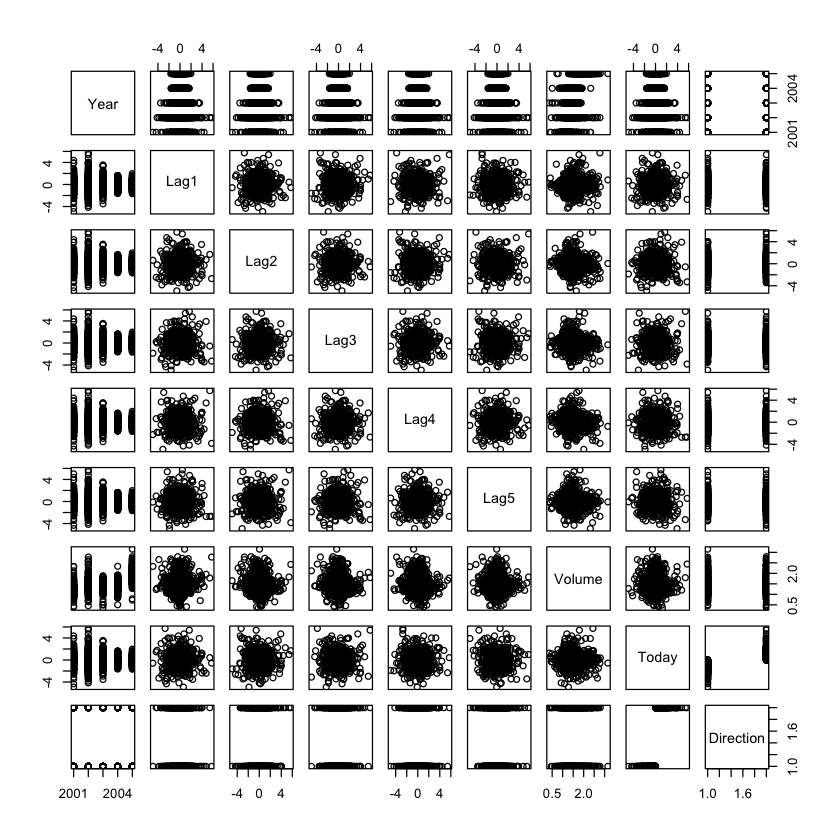

In [6]:
pairs(Smarket)

The `cor()` function produces a matrix that contains all of the pairwise correlations among the predictors in a data set. The first command below gives an error message because the Direction variable is qualitative.

In [7]:
cor(Smarket)

ERROR: Error in cor(Smarket): 'x' must be numeric


In [8]:
cor(Smarket[, -9])

Year       Lag1         Lag2         Lag3         Lag4        
Year   1.00000000  0.029699649  0.030596422  0.033194581  0.035688718
Lag1   0.02969965  1.000000000 -0.026294328 -0.010803402 -0.002985911
Lag2   0.03059642 -0.026294328  1.000000000 -0.025896670 -0.010853533
Lag3   0.03319458 -0.010803402 -0.025896670  1.000000000 -0.024051036
Lag4   0.03568872 -0.002985911 -0.010853533 -0.024051036  1.000000000
Lag5   0.02978799 -0.005674606 -0.003557949 -0.018808338 -0.027083641
Volume 0.53900647  0.040909908 -0.043383215 -0.041823686 -0.048414246
Today  0.03009523 -0.026155045 -0.010250033 -0.002447647 -0.006899527
       Lag5         Volume      Today       
Year    0.029787995  0.53900647  0.030095229
Lag1   -0.005674606  0.04090991 -0.026155045
Lag2   -0.003557949 -0.04338321 -0.010250033
Lag3   -0.018808338 -0.04182369 -0.002447647
Lag4   -0.027083641 -0.04841425 -0.006899527
Lag5    1.000000000 -0.02200231 -0.034860083
Volume -0.022002315  1.00000000  0.014591823
Today  -0.034860083  0.01459182  1.000000000

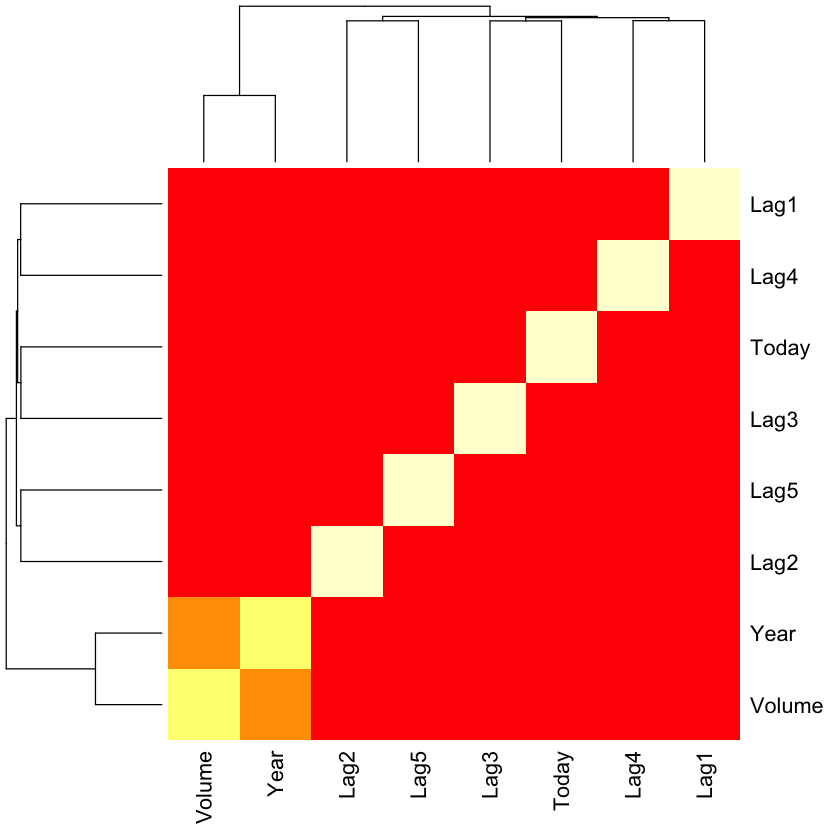

In [9]:
heatmap(cor(Smarket[,-9]), col=)

In [10]:
attach(Smarket)

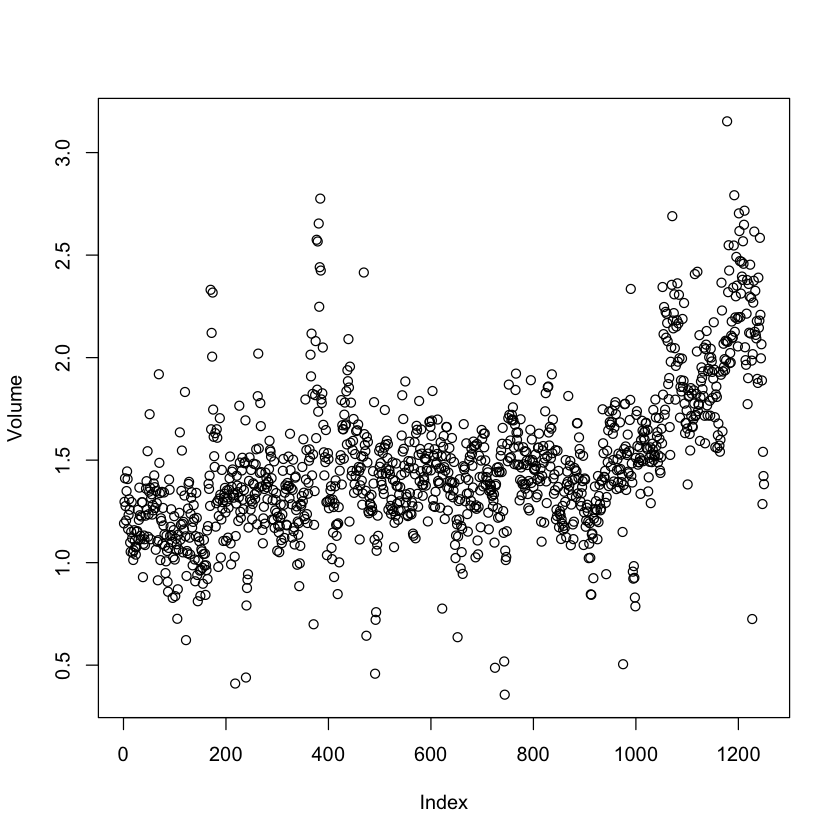

In [11]:
plot(Volume)

## Logistic regression
Next, we will fit a logistic regression model in order to predict Direction
using `Lag1` through `Lag5` and `Volume`. The *glm()* function fits generalized linear models, a class of models that includes logistic regression. The syntax generalized of the `glm()` function is similar to that of `lm()`, except that we must pass in the argument `family=binomial` in order to tell R to run a logistic regression
rather than some other type of generalized linear model.

In [12]:
glm.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial)

In [13]:
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


The smallest p-value here is associated with `Lag1`. The negative coefficient for this predictor suggests that if the market had a positive return yesterday, then it is less likely to go up today. However, at a value of 0.15, the p-value is still relatively large, and so there is no clear evidence of a real association between `Lag1` and `Direction`.

In [15]:
coef(glm.fit)

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

In [16]:
summary(glm.fit)$coef

Estimate     Std. Error z value    Pr(>|z|) 
(Intercept) -0.126000257 0.24073574 -0.5233966 0.6006983
Lag1        -0.073073746 0.05016739 -1.4565986 0.1452272
Lag2        -0.042301344 0.05008605 -0.8445733 0.3983491
Lag3         0.011085108 0.04993854  0.2219750 0.8243333
Lag4         0.009358938 0.04997413  0.1872757 0.8514445
Lag5         0.010313068 0.04951146  0.2082966 0.8349974
Volume       0.135440659 0.15835970  0.8552723 0.3924004

In [17]:
summary(glm.fit)$coef[,4]

(Intercept)        Lag1        Lag2        Lag3        Lag4        Lag5 
  0.6006983   0.1452272   0.3983491   0.8243333   0.8514445   0.8349974 
     Volume 
  0.3924004

The **predict()** function can be used to predict the probability that the market will go up, given values of the predictors. The type="response" option tells R to output probabilities of the form P(Y = 1|X), as opposed to other information such as the logit. If no data set is supplied to the predict() function, then the probabilities are computed for the training data that was used to fit the logistic regression model. Here we have printed only the first ten probabilities. We know that these values correspond to the probability of the market going up, rather than down, because the **contrasts()** function indicates that R has created a dummy variable with a 1 for Up.

In [21]:
contrasts(Smarket$Direction)

Up
Down 0 
Up   1

In [22]:
glm.probs = predict(glm.fit, type="response")

In [23]:
glm.probs[1:10]

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

In [24]:
glm.pred = rep("Down", 1250)
glm.pred[glm.probs>0.5] = "Up"

In [25]:
table(glm.pred, Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [26]:
(507+145)/1250

[1] 0.5216

In [27]:
mean(glm.pred == Direction)

[1] 0.5216

At first glance, it appears that the logistic regression model is working a little better than random guessing. However, this result is misleading because we trained and tested the model on the same set of 1, 250 observa- tions. In other words, 100 − 52.2 = 47.8 % is the training error rate. As we have seen previously, the training error rate is often overly optimistic—it tends to underestimate the test error rate. In order to better assess the ac- curacy of the logistic regression model in this setting, we can fit the model using part of the data, and then examine how well it predicts the held out data. This will yield a more realistic error rate, in the sense that in prac- tice we will be interested in our model’s performance not on the data that we used to fit the model, but rather on days in the future for which the market’s movements are unknown.

To implement this strategy, we will first create a vector corresponding to the observations from 2001 through 2004. We will then use this vector to create a held out data set of observations from 2005.

In [28]:
train = (Year < 2005)
Smarket.2005 = Smarket[!train, ]
dim(Smarket.2005)
Direction.2005 = Direction[!train]

[1] 252   9

In [30]:
ls()

[1] "Direction.2005" "glm.fit"        "glm.pred"       "glm.probs"     
[5] "Smarket.2005"   "train"

In [32]:
glm.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial, subset=train)

In [33]:
glm.probs = predict(glm.fit, Smarket.2005, type="response")

In [34]:
glm.pred = rep("Down", 252)
glm.pred[glm.probs > 0.5] = "Up"

In [40]:
table(glm.pred, Direction.2005)

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

In [36]:
mean(glm.pred == Direction.2005)

[1] 0.4801587

In [37]:
mean(glm.pred != Direction.2005)

[1] 0.5198413

We recall that the logistic regression model had very underwhelming p- values associated with all of the predictors, and that the smallest p-value, though not very small, corresponded to Lag1. Perhaps by removing the variables that appear not to be helpful in predicting Direction, we can obtain a more effective model. After all, using predictors that have no relationship with the response tends to cause a deterioration in the test error rate (since such predictors cause an increase in variance without a corresponding decrease in bias), and so removing such predictors may in turn yield an improvement. Below we have refit the logistic regression using just Lag1 and Lag2, which seemed to have the highest predictive power in the original logistic regression model.

In [39]:
glm.fit = glm(Direction~Lag1+Lag2, data=Smarket, family=binomial, subset=train)
glm.probs = predict(glm.fit, Smarket.2005, type="response")
glm.pred=rep("Down", 252)
glm.pred[glm.probs > 0.5] = "Up"
mean(glm.pred == Direction.2005)

[1] 0.5595238

Suppose that we want to predict the returns associated with particular values of Lag1 and Lag2. In particular, we want to predict Direction on a day when Lag1 and Lag2 equal 1.2 and 1.1, respectively, and on a day when they equal 1.5 and −0.8. We do this using the predict() function.

In [41]:
predict(glm.fit, newdata=data.frame(Lag1=c(1.2, 1.5), Lag2=c(1.1, -0.8)), type="response")

1         2 
0.4791462 0.4960939

## Linear Discriminant Analysis
Now we will perform LDA on the Smarket data. In R, we fit a LDA model using the `lda()` function, which is part of the MASS library. Notice that the syntax for the `lda()` function is identical to that of `lm()`, and to that of `glm()` except for the absence of the family option. We fit the model using only the observations before 2005.

In [42]:
library(MASS)
lda.fit = lda(Direction~Lag1+Lag2, data=Smarket, subset=train)

In [43]:
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

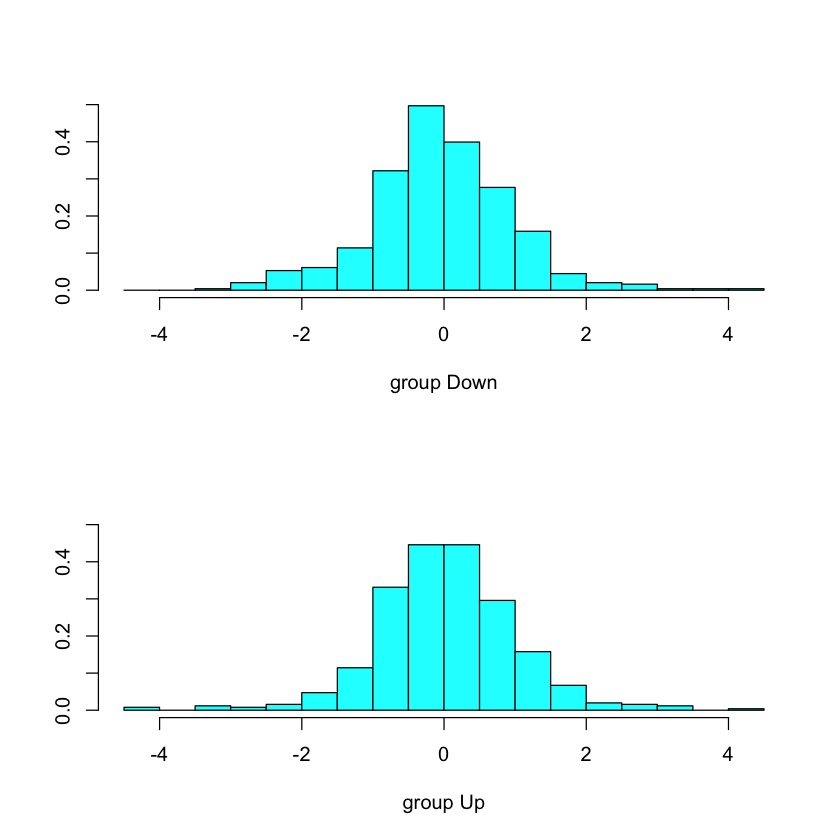

In [44]:
plot(lda.fit)

In [45]:
lda.pred = predict(lda.fit, Smarket.2005)

In [46]:
names(lda.pred)

[1] "class"     "posterior" "x"

The predict() function returns a list with three elements. The first ele- ment, class, contains LDA’s predictions about the movement of the market. The second element, posterior, is a matrix whose kth column contains the posterior probability that the corresponding observation belongs to the kth class, computed from (4.10). Finally, x contains the linear discriminants, described earlier.

In [51]:
lda.pred$class[1:10]

[1] Up Up Up Up Up Up Up Up Up Up
Levels: Down Up

In [50]:
lda.pred$x[1:10]

[1]  0.08293096  0.59114102  1.16723063  0.83335022 -0.03792892 -0.08743142
 [7] -0.14512719  0.21701324  0.05873792  0.35068642

In [52]:
mean(lda.pred$class == Direction.2005)

[1] 0.5595238

In [53]:
lda.pred$posterior

Down      Up       
999  0.4901792 0.5098208
1000 0.4792185 0.5207815
1001 0.4668185 0.5331815
1002 0.4740011 0.5259989
1003 0.4927877 0.5072123
1004 0.4938562 0.5061438
1005 0.4951016 0.5048984
1006 0.4872861 0.5127139
1007 0.4907013 0.5092987
1008 0.4844026 0.5155974
1009 0.4906963 0.5093037
1010 0.5119988 0.4880012
1011 0.4895152 0.5104848
1012 0.4706761 0.5293239
1013 0.4744593 0.5255407
1014 0.4799583 0.5200417
1015 0.4935775 0.5064225
1016 0.5030894 0.4969106
1017 0.4978806 0.5021194
1018 0.4886331 0.5113669
1019 0.5006568 0.4993432
1020 0.5108735 0.4891265
1021 0.5039925 0.4960075
1022 0.4916335 0.5083665
1023 0.5041772 0.4958228
1024 0.5026751 0.4973249
1025 0.4914043 0.5085957
1026 0.4805964 0.5194036
1027 0.4882718 0.5117282
1028 0.5062187 0.4937813
⋮    ⋮         ⋮        
1221 0.4901606 0.5098394
1222 0.5069730 0.4930270
1223 0.5084764 0.4915236
1224 0.5041288 0.4958712
1225 0.5048299 0.4951701
1226 0.5023879 0.4976121
1227 0.4986903 0.5013097
1228 0.4824758 0.5175242
1229 0.4825469 0.5174531
1230 0.4831600 0.5168400
1231 0.5017497 0.4982503
1232 0.5058708 0.4941292
1233 0.4890321 0.5109679
1234 0.4911052 0.5088948
1235 0.4864250 0.5135750
1236 0.4847062 0.5152938
1237 0.4944890 0.5055110
1238 0.4962261 0.5037739
1239 0.5005702 0.4994298
1240 0.5039068 0.4960932
1241 0.4946376 0.5053624
1242 0.4864366 0.5135634
1243 0.4807022 0.5192978
1244 0.4851439 0.5148561
1245 0.4951734 0.5048266
1246 0.5005893 0.4994107
1247 0.4972210 0.5027790
1248 0.4791988 0.5208012
1249 0.4831673 0.5168327
1250 0.4892591 0.5107409

## Quadratic Discriminant Analysis
QDA is implemented in R using the `qda()` function, which is also part of the `MASS` library. The `qda()` syntax is identical to that of `lda()`.

In [54]:
qda.fit = qda(Direction~Lag1+Lag2, data=Smarket, subset=train)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

The output contains the group means. But it does not contain the coef- ficients of the linear discriminants, because the QDA classifier involves a quadratic, rather than a linear, function of the predictors. The predict() function works in exactly the same fashion as for LDA.

In [55]:
qda.class = predict(qda.fit, Smarket.2005)$class

In [56]:
table(qda.class, Direction.2005)

         Direction.2005
qda.class Down  Up
     Down   30  20
     Up     81 121

In [57]:
mean(qda.class == Direction.2005)

[1] 0.5992063

Interestingly, the QDA predictions are accurate almost **60%** of the time, even though the 2005 data was not used to fit the model. This level of accu- racy is quite impressive for stock market data, which is known to be quite hard to model accurately. This suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression. However, we recommend evaluating this method’s performance on a larger test set before betting that this approach will consistently beat the market!

## K-Nearest Neighbors
We will now perform KNN using the `knn()` function, which is part of the `class` library. This function works rather differently from the other model- fitting functions that we have encountered thus far. Rather than a two-step approach in which we first fit the model and then we use the model to make predictions, knn() forms predictions using a single command. The function requires four inputs.

1. A matrix containing the predictors associated with the training data, labeled `train.X` below.
2. A matrix containing the predictors associated with the data for which we wish to make predictions, labeled `test.X` below.
3. A vector containing the class labels for the training observations, labeled `train.Direction` below.
4. A value for `K`, the number of nearest neighbors to be used by the classifier.

In [59]:
library(class)
train.X = cbind(Lag1, Lag2)[train,]
test.X = cbind(Lag1, Lag2)[!train,]
train.Direction = Direction[train]

In [62]:
set.seed(10)
knn.pred = knn(train.X, test.X, train.Direction, k = 1)
table(knn.pred, Direction.2005)
mean(knn.pred == Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83

[1] 0.5

The results using K = 1 are not very good, since only 50 % of the observa- tions are correctly predicted. Of course, it may be that K = 1 results in an overly flexible fit to the data. Below, we repeat the analysis using K = 3.

In [64]:
knn.pred = knn(train.X, test.X, train.Direction, k = 3)
table(knn.pred, Direction.2005)
mean(knn.pred == Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   48 55
    Up     63 86

[1] 0.531746

The results have improved slightly. But increasing K further turns out to provide no further improvements. It appears that for this data, QDA provides the best results of the methods that we have examined so far.